# LTCC status visual

This Jupyter Notebook can be used to create the "LTCC status table through time" plot.

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_status_array(status_file):
    with open(status_file) as fp:
        return np.loadtxt(status_file, dtype=int).reshape(6,2,18,4)

**Data path**

In [3]:
data_path = '../ltccCalibrationData/status/'  # my local data path - replace with the correct repo/folder location


**Memo on the shape**

Each status file has 216 lines: 6 sectors, 2 sides (L|R), 18 channels.

Creating a (6, 2, 18, 4) array. The last dimension - last index contains the status value

- 1st sector, left, 1st channel = s[0,0,0]
- 1st sector, left, 2nd channel = s[0,0,1]
- ...
- 1st sector, right, 1st channel = s[0,1,0]
- ...

In [4]:
# Just a check of the get_status_array function  
s = get_status_array(data_path + 'LTCC_status_0.txt')
print("s shape =",s.shape)


s shape = (6, 2, 18, 4)


**Data ranges**

- RG-M Fall 2021 : 14776-15884
- RG-I Summer 2021   : 14130-14775
- RG-F Summer 2020   : 12321-12951
- RG-F Spring 2020 : 11607-12282
- RG-B Winter 2020   : 11323-11571
- RG-B Fall 2019   : 11014-11309
- RG-A Spring 2019 : 6607-6783
- RG-B Spring 2019 : 6141-6606
- RG-K Fall 2018   : 5674-6000
- RG-A Fall 2018   : 4760-5674
- RG-A Spring 2018 : 3029-4326
- Engineering Run  : 1960-2999

In [5]:
rg_ranges = [{'name' : 'RG-C Summer 2022', 'start_run' : 16000, 'end_run'   : 20000},
             {'name' : 'RG-M Fall 2021', 'start_run' : 14776, 'end_run'   : 15884},
             {'name' : 'RG-I Summer 2021', 'start_run' : 14130, 'end_run'   : 14775},
             {'name' : 'RG-F Summer 2020', 'start_run' : 12321, 'end_run'   : 12951},
             {'name' : 'RG-F Spring 2020', 'start_run' : 11607, 'end_run'   : 12282},
             {'name' : 'RG-B Winter 2020', 'start_run' : 11323, 'end_run'   : 11571},
             {'name' : 'RG-B Fall 2019', 'start_run' : 11014, 'end_run'   : 11309},
             {'name' : 'RG-A Spring 2019', 'start_run' : 6607, 'end_run'   : 6783},
             {'name' : 'RG-B Spring 2019', 'start_run' : 6141, 'end_run'   : 6606},
             {'name' : 'RG-K Fall 2018', 'start_run' : 5674, 'end_run'   : 6000},
             {'name' : 'RG-A Fall 2018', 'start_run' : 4760, 'end_run'   : 5674},
             {'name' : 'RG-A Spring 2018', 'start_run' : 3029, 'end_run'   : 4326},
             {'name' : 'Engineering Run', 'start_run' : 1960, 'end_run'   : 2999}
            ]

In [6]:
# Read all the available status files

files = glob.glob(data_path + '*status_[0-9]*')
runs = [{
    'run_number': int(f.split("_")[-1].split(".")[0]),
    'path'      : f,
    'status'    : get_status_array(f)
} for f in files if int(f.split("_")[-1].split(".")[0])>0]

runs = sorted(runs, key=lambda x:x['run_number'])
print('Available runs: ',[r['run_number'] for r in runs])

Available runs:  [3135, 5472, 5694, 5700, 5893, 6200, 6201, 6213, 6379, 6380, 6386, 6389, 6396, 6420, 6467, 6522, 6591, 6609, 6619, 6631, 6672, 6698, 6715, 6765, 11015, 11171, 11324, 11489, 11674, 12422, 12478, 16066]


In [7]:
# Check which run do I have for each RG

print(f"{'Run group':<20} {'Start-End':<20} {'Monitored runs for status table':<20}")
print('-'*100)
for rg in rg_ranges:
    print(f"{rg['name']:<20} {str(rg['start_run'])+'-'+str(rg['end_run']):<20}", end='')
    for r in runs:
        if rg['start_run']<= r['run_number'] <= rg['end_run']:
            print(r['run_number'], end=', ')
    print('')

Run group            Start-End            Monitored runs for status table
----------------------------------------------------------------------------------------------------
RG-C Summer 2022     16000-20000         16066, 
RG-M Fall 2021       14776-15884         
RG-I Summer 2021     14130-14775         
RG-F Summer 2020     12321-12951         12422, 12478, 
RG-F Spring 2020     11607-12282         11674, 
RG-B Winter 2020     11323-11571         11324, 11489, 
RG-B Fall 2019       11014-11309         11015, 11171, 
RG-A Spring 2019     6607-6783           6609, 6619, 6631, 6672, 6698, 6715, 6765, 
RG-B Spring 2019     6141-6606           6200, 6201, 6213, 6379, 6380, 6386, 6389, 6396, 6420, 6467, 6522, 6591, 
RG-K Fall 2018       5674-6000           5694, 5700, 5893, 
RG-A Fall 2018       4760-5674           5472, 
RG-A Spring 2018     3029-4326           3135, 
Engineering Run      1960-2999           


In [8]:
# Crate a run axis based on the run numbers in the runs dict
# exclude run 0
run_list = [r['run_number'] for r in runs if (r['run_number']>0)]
# put here some custo run range to create a zoomed plot later on
#run_list = [r['run_number'] for r in runs if (r['run_number']>11000) and (r['run_number']<12500)]  # custom run range
run_min, run_max = min(run_list), max(run_list)
print("From",run_min,"to",run_max)
run_axis = np.arange(run_min, run_max, dtype=int)

From 3135 to 16066


In [9]:
# Function to retrieve the status for a given sector and render its status in a 2D plot
def get_status_2d(sector=0, side=0):
    status_2d = np.zeros((18,len(run_axis)), dtype=int)
    ipos = 0
    for i,r in enumerate(run_list[:-1]):
        start_run = r
        stop_run  = run_list[i+1]
        #print(i,i%2,start_run,stop_run,ipos)
        # print(i,runs[i]['run_number'],runs[i]['status'][2,0,9,3])
        how_many = stop_run-start_run
        for j in range(ipos, ipos+how_many): #start_run,stop_run
            for k in range(18):
                status_2d[k,j] = runs[i]['status'][sector,side,k,3]*255 + (1-runs[i]['status'][sector,side,k,3])*40*(i%2)
        ipos += how_many
    return status_2d

Note: *bwr* is a [diverging colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html#diverging) ranging from blue to red. When assigning a status value in the *get_status_2d* function the maximum (255) is set for status=1, whereas an intermediate 0, 40, 0, 40 is used to represent status=1 but with alternating shades of blues to rep.


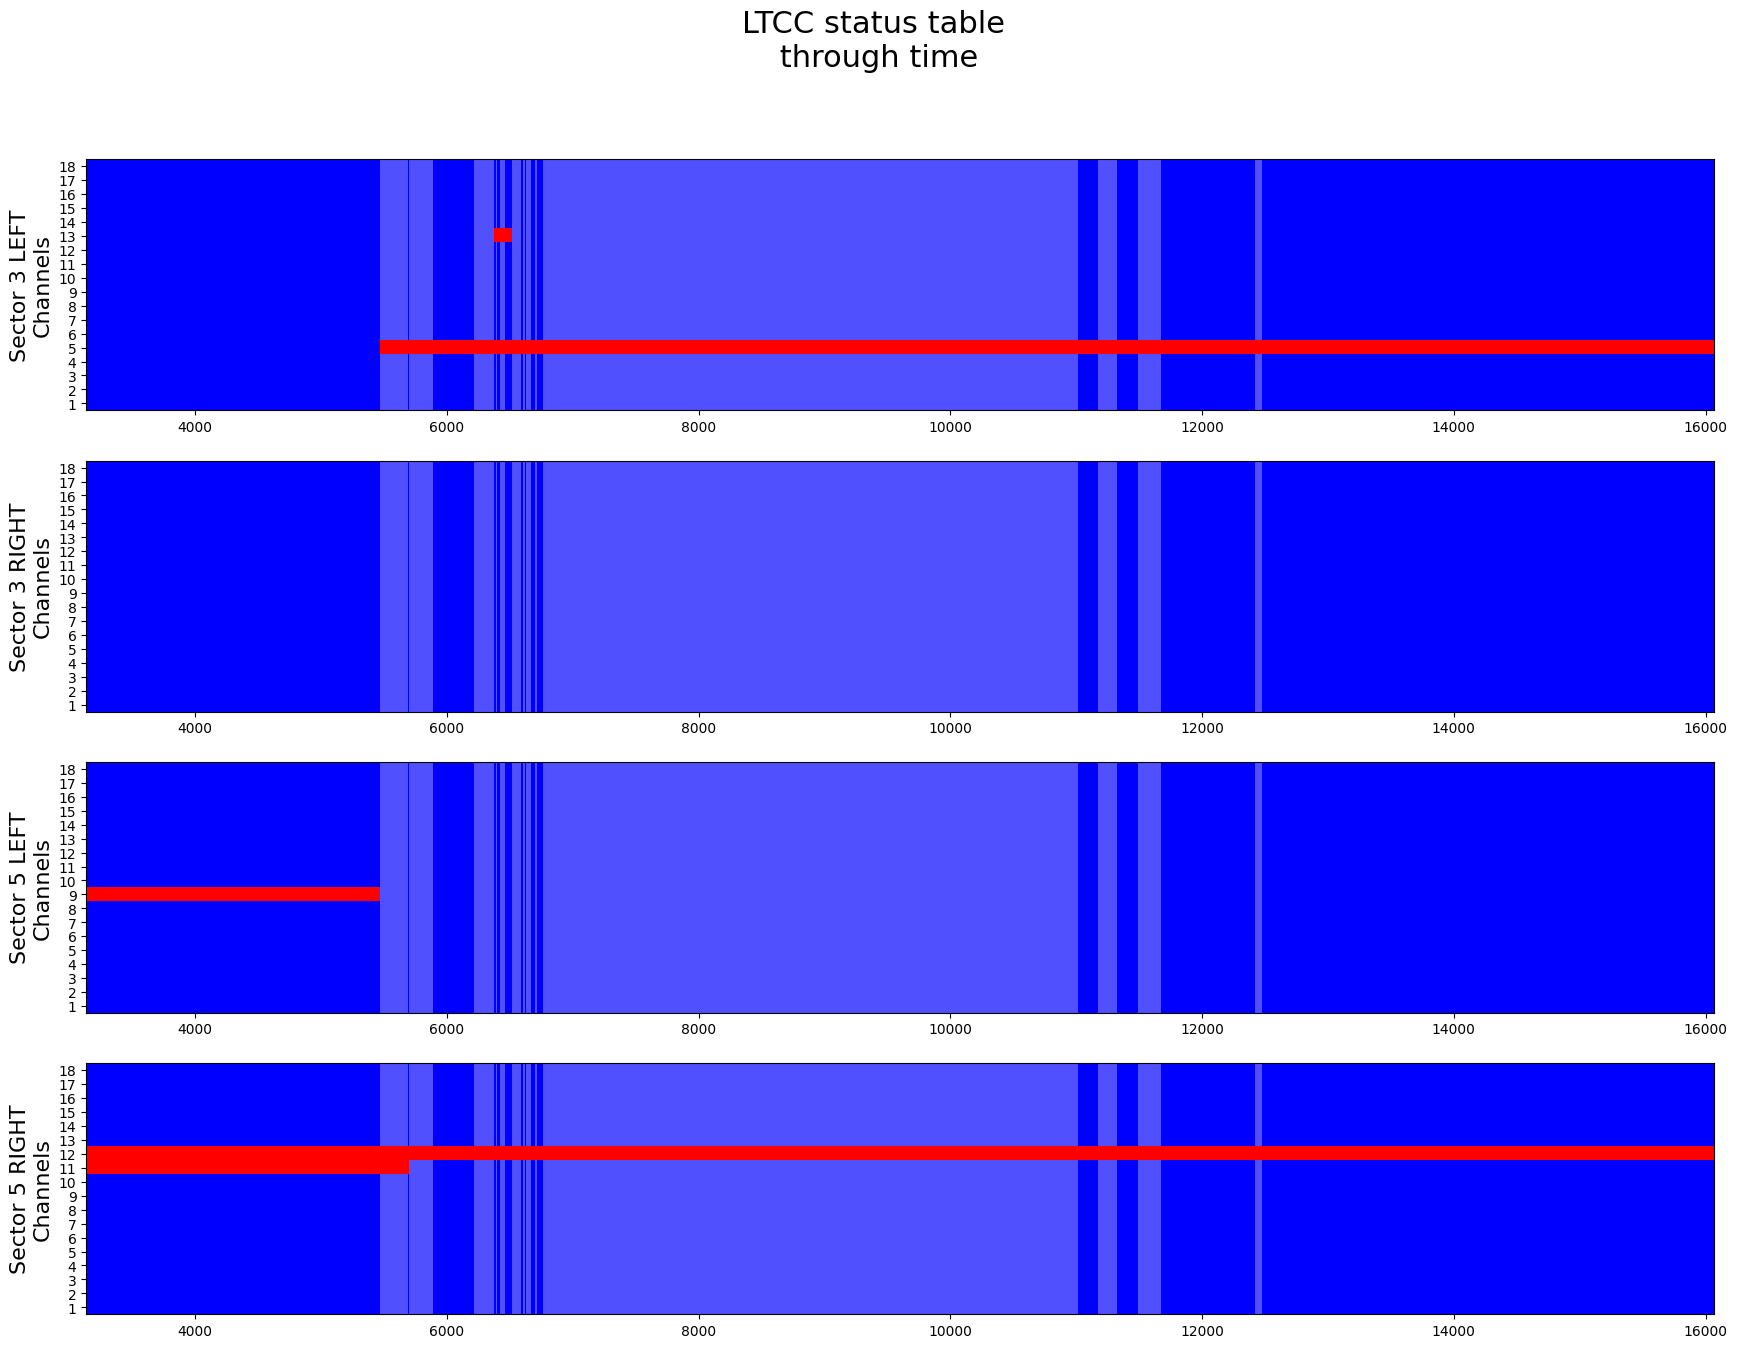

In [10]:
fig, ax = plt.subplots(4,1,figsize=(21,15))
fig.suptitle("LTCC status table\n through time", fontsize=22)
ax[0].imshow(get_status_2d(2,0), aspect='auto', origin='lower', extent = [run_axis[0],run_axis[-1],0.5,18.5], cmap='bwr', interpolation='none', vmin=0, vmax=255)
ax[1].imshow(get_status_2d(2,1), aspect='auto', origin='lower', extent = [run_axis[0],run_axis[-1],0.5,18.5], cmap='bwr', interpolation='none', vmin=0, vmax=255)
ax[2].imshow(get_status_2d(4,0), aspect='auto', origin='lower', extent = [run_axis[0],run_axis[-1],0.5,18.5], cmap='bwr', interpolation='none', vmin=0, vmax=255)
ax[3].imshow(get_status_2d(4,1), aspect='auto', origin='lower', extent = [run_axis[0],run_axis[-1],0.5,18.5], cmap='bwr', interpolation='none', vmin=0, vmax=255)
#ax.set_xticks(run_axis)
ax[0].set_yticks(range(1,19))
ax[1].set_yticks(range(1,19))
ax[2].set_yticks(range(1,19))
ax[3].set_yticks(range(1,19))
ax[0].set_ylabel("Sector 3 LEFT\nChannels", fontsize=16)
ax[1].set_ylabel("Sector 3 RIGHT\nChannels", fontsize=16)
ax[2].set_ylabel("Sector 5 LEFT\nChannels", fontsize=16)
ax[3].set_ylabel("Sector 5 RIGHT\nChannels", fontsize=16)
plt.show()

### Further inspection

In [11]:
# Inspect a specific channel story 

SEC = 5  # CLAS numbering -> Sec1 ... Sec6
SIDE = 2 # CLAS numbering -> LEFT=1, RIGHT=2
CH =  11 # CLAS numbering -> Ch1 ... Ch18

channel_history = get_status_2d(SEC-1,SIDE-1)[CH-1, :]
channel_history.shape

(12931,)

In [12]:
channel_history

array([255, 255, 255, ...,   0,   0,   0])

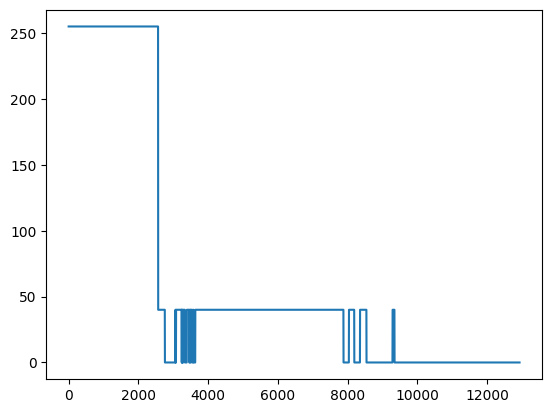

In [13]:
# Remember that:
# - I used values around 30-50 to highlight blue region. 
# - x axis is just an index here, in order to have runs I need the run_axis = np.arange(run_min, run_max, dtype=int)
plt.plot(channel_history)
plt.show()

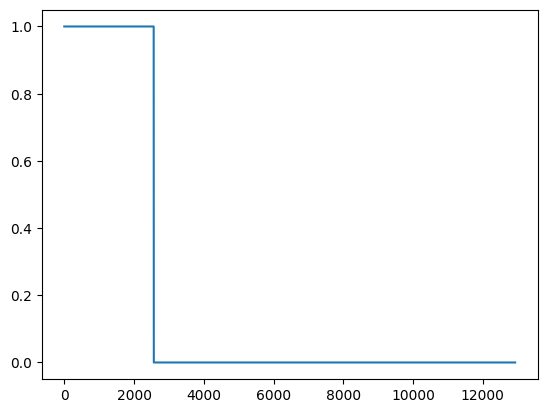

In [14]:
# Threshold around 100 makes sense
plt.plot(channel_history>100)
plt.show()

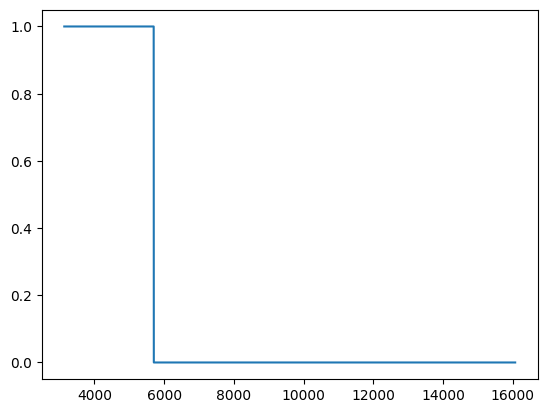

In [15]:
# x axis with run numbers
plt.plot(run_axis, channel_history>100)
plt.show()

In [16]:
# getting exact transitions
transitions = np.where(np.diff(channel_history>100, prepend=0)!=0)[0]
print("index",transitions,"==> runs",run_axis[transitions])

index [   0 2565] ==> runs [3135 5700]
